# Proyek Analisis Data: Proyek Analisis Data
- **Nama:** Alya Fitri Nurhaliza
- **Email:** alyafitrin@gmail.com
- **ID Dicoding:** alyafn

## Menentukan Pertanyaan Bisnis

- Bagaimana pola musiman dalam permintaan penyewaan sepeda, dan bagaimana perbedaannya dari tahun ke tahun?
- Apa saja jam-jam sibuk untuk penyewaan sepeda pada musim-musim yang berbeda, dan bagaimana pola-pola ini bervariasi antara tahun 2011 dan 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

Output diatas menghasilkan dataset yang menampilkan beberapa kolom, berikut penjelasa setiap kolom:
- instant : index catatan
- dteday : tanggal
- season : musim (1:semi, 2:panas, 3:gugur, 4: dingin)
- yr : tahun
- mnth : bulan
- hr : jam
- holiday : cuaca hari libur atau tidak
- weekday : hari dalam seminggu
- workingday : jika hari tersebut bukan hari minggu atau hari libur adalah 1, selain itu adalah 0
- weathersit :
  - 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
  - 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
  - 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar
  - 4: Hujan Lebat + Es + Badai Petir + Kabut, Salju + Kabut
- temp : suhu sesungguhnya dalam celsius
- atemp : Suhu yang dirasakan dalam celsius
- hum: Kelembaban yang dinormalkan. Nilainya dibagi menjadi 100 (maks)
- windspeed: Kecepatan angin yang dinormalkan. Nilainya dibagi menjadi 67 (maks)
- casual: jumlah pengguna kasual
- registered: jumlah pengguna terdaftar
- cnt: jumlah total sepeda sewaan termasuk kasual dan terdaftar

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset berisi 731 baris dan 16 kolom
- Tidak terjadi missing value pada dataset karena jumlah setiap baris pada tiap kolom sama dengan jumlah baris
- Terdapat beberapa tipe data pada tiap kolom:
  - Float64: temp, atemp, hum, windspeed
  - int64: instant, season, yr, mnth, holiday, weekday, workingday, weathersit, casual, reginteres, cnt
  - object: dteday
- Penggunaan memori pada dataset ini sebanyak 91,5+ MB

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Dataset berisi 17,379 baris dan 17 kolom
- Tidak terjadi missing value pada dataset karena jumlah setiap baris pada tiap kolom sama dengan jumlah baris
- Terdapat beberapa tipe data pada tiap kolom:
  - Float64: temp, atemp, hum, windspeed
  - int64: instant, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, casual, reginteres, cnt
  - object: dteday
- Penggunaan memori pada dataset ini sebanyak 2,3+ MB

In [7]:
print("Jumlah duplikasi day: ", day_df.duplicated().sum())
print("Jumlah duplikasi hour: ", hour_df.duplicated().sum())

Jumlah duplikasi day:  0
Jumlah duplikasi hour:  0


**Insight**:

Tidak terdapat duplikasi data pada setiap dataset

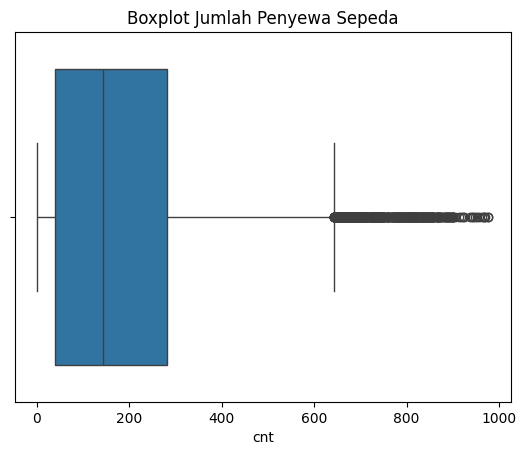

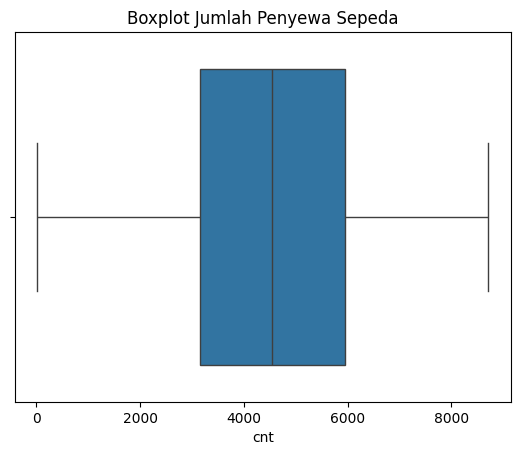

In [8]:
sns.boxplot(x='cnt', data=hour_df)
plt.title('Boxplot Jumlah Penyewa Sepeda')
plt.show()

print("")

sns.boxplot(x='cnt', data=day_df)
plt.title('Boxplot Jumlah Penyewa Sepeda')
plt.show()

**Insight**

Dapat dilihat dengan jelas outlier dari jumlah penyewa sepeda pada kolom cnt (dataset hour) menggunakan visuaslisasi boxplot. Bulat-bulat hitam diatas merupakan outlier. Sedangkan pada dataset day dengan kolom yang salam tidak terdapat outlier

In [9]:
def find_outliers_IQR(df):
  Q1=df.quantile(0.25)
  Q3=df.quantile(0.75)
  IQR=Q3-Q1
  outliers = df[((df<=(Q1-1.5*IQR)) | (df>=(Q3+1.5*IQR)))]
  return outliers

In [10]:
outliers = find_outliers_IQR(hour_df['cnt'])

print('number of outliers: '+ str(len(outliers)))

outliers

number of outliers: 505


,cnt
5536,651
10358,644
10359,712
10382,676
10383,734
...,...
16885,724
16909,688
16933,679
17053,662


**Insight:**

Hasil dalam kolom cnt pada dataset diatas merupakan data outlier yang berjumlah 505 baris

### Cleaning Data

In [11]:
def remove_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

hour_df = remove_outliers(hour_df, 'cnt')
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

Dataset diatas merupakan hasil dari clean dataset penghapusan outlier. Pada jumlah baris sudah berkurang dari 17279 menjadi 16874. Pengurangan dataset tersebut menjadi tanda bahwa sudah adanya penghapusan outlier.

In [12]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
day_df.loc[day_df["season"] == 1, "season"] = "springer"
day_df.loc[day_df["season"] == 2, "season"] = "summer"
day_df.loc[day_df["season"] == 3, "season"] = "fall"
day_df.loc[day_df["season"] == 4, "season"] = "winter"

hour_df.loc[hour_df["season"] == 1, "season"] = "springer"
hour_df.loc[hour_df["season"] == 2, "season"] = "summer"
hour_df.loc[hour_df["season"] == 3, "season"] = "fall"
hour_df.loc[hour_df["season"] == 4, "season"] = "winter"

<ipython-input-13-1fe5eb922367>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  day_df.loc[day_df["season"] == 1, "season"] = "springer"
<ipython-input-13-1fe5eb922367>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'springer' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hour_df.loc[hour_df["season"] == 1, "season"] = "springer"


In [14]:
day_df.loc[day_df["yr"] == 0, "yr"] = 2011
day_df.loc[day_df["yr"] == 1, "yr"] = 2012

hour_df.loc[hour_df["yr"] == 0, "yr"] = 2011
hour_df.loc[hour_df["yr"] == 1, "yr"] = 2012

In [15]:
day_df.to_csv('clean_day.csv')
hour_df.to_csv('clean_hour.csv')

## Exploratory Data Analysis (EDA)

### Group data by season and year

In [16]:
seasonal_data = day_df.groupby(['season', 'yr'])['cnt'].agg(['mean', 'sum']).reset_index()
seasonal_data

,season,yr,mean,sum
0,fall,2011,4464.361702,419650
1,fall,2012,6824.244681,641479
2,springer,2011,1666.666667,150000
3,springer,2012,3531.296703,321348
4,summer,2011,3775.173913,347316
5,summer,2012,6209.489130,571273
6,winter,2011,3664.460674,326137
7,winter,2012,5791.865169,515476


**Insight:**

Mengelompokkan data berdasarkan musim dan tahun untuk menghitung total penyewaan (cnt) dan rata-rata penyewaan untuk setiap musim di tahun 2011 dan 2012.

### Group data by hour, season, and year to calculate average rentals

In [17]:
hourly_trend = hour_df.groupby(['hr', 'season', 'yr'])['cnt'].mean().reset_index()
hourly_trend

,hr,season,yr,cnt
0,0,fall,2011,61.064516
1,0,fall,2012,86.627660
2,0,springer,2011,18.712644
3,0,springer,2012,35.714286
4,0,summer,2011,45.847826
...,...,...,...,...
187,23,springer,2012,58.395604
188,23,summer,2011,75.413043
189,23,summer,2012,116.554348
190,23,winter,2011,69.438202


**Insight:**

Mengelompokkan data berdasarkan jam, musim, dan tahun untuk menghitung rata-rata penyewaan untuk setiap musim di tahun 2011 dan 2012.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

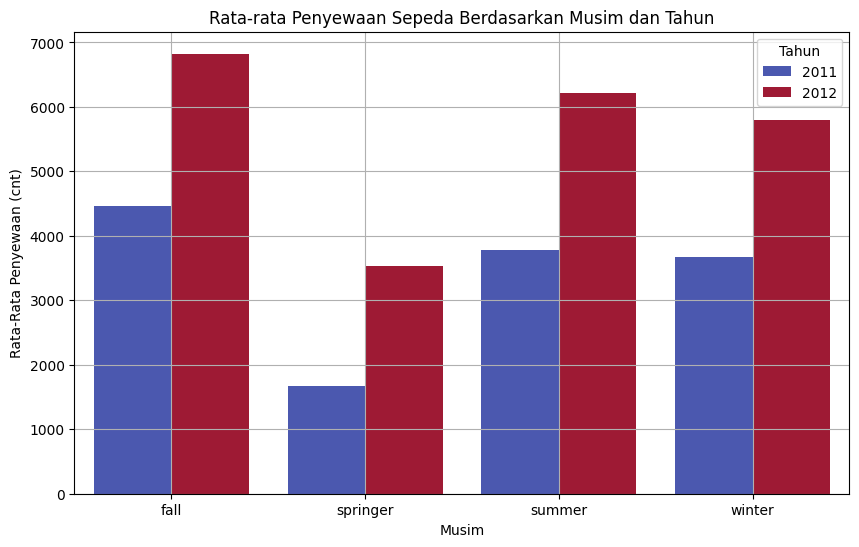

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=seasonal_data, x='season', y='mean', hue='yr', palette='coolwarm')

plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim dan Tahun")
plt.xlabel("Musim")
plt.ylabel("Rata-Rata Penyewaan (cnt)")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

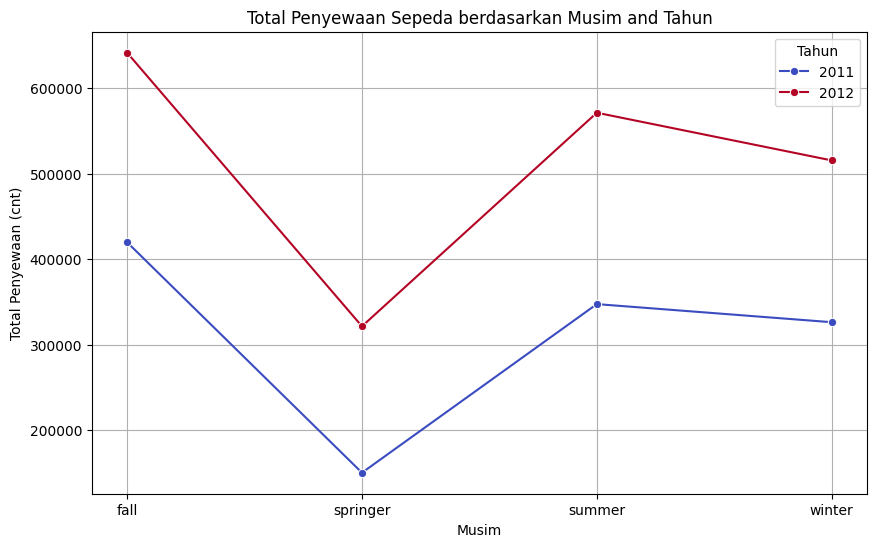

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=seasonal_data, x='season', y='sum', hue='yr', marker='o', palette='coolwarm')

plt.title("Total Penyewaan Sepeda berdasarkan Musim and Tahun")
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan (cnt)")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

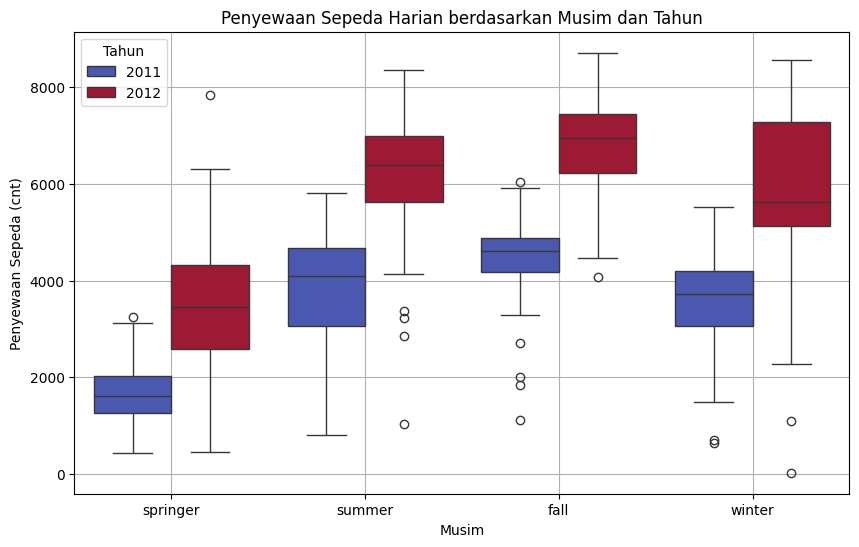

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='season', y='cnt', hue='yr', palette='coolwarm')

plt.title("Penyewaan Sepeda Harian berdasarkan Musim dan Tahun")
plt.xlabel("Musim")
plt.ylabel("Penyewaan Sepeda (cnt)")
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

### Pertanyaan 2:

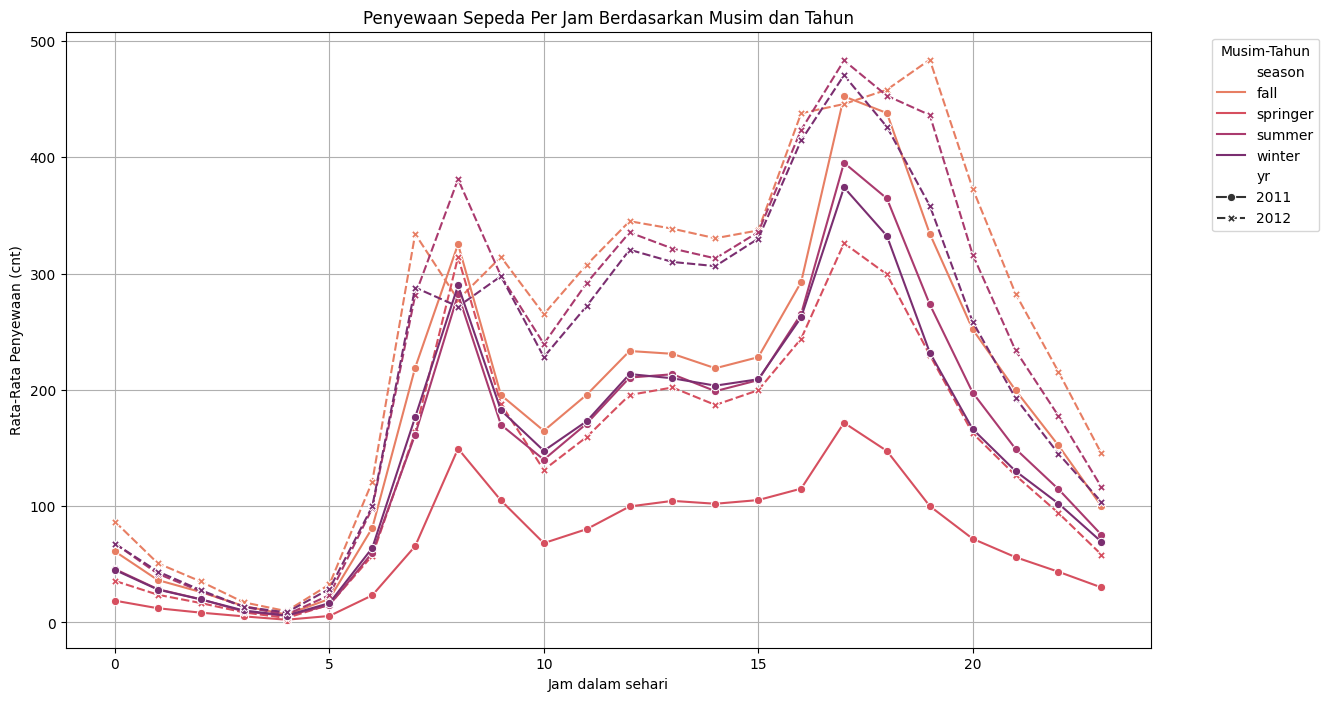

In [21]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=hourly_trend, x='hr', y='cnt', hue='season', style='yr', markers=True, palette='flare')

plt.title("Penyewaan Sepeda Per Jam Berdasarkan Musim dan Tahun")
plt.xlabel("Jam dalam sehari")
plt.ylabel("Rata-Rata Penyewaan (cnt)")
plt.legend(title="Musim-Tahun", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

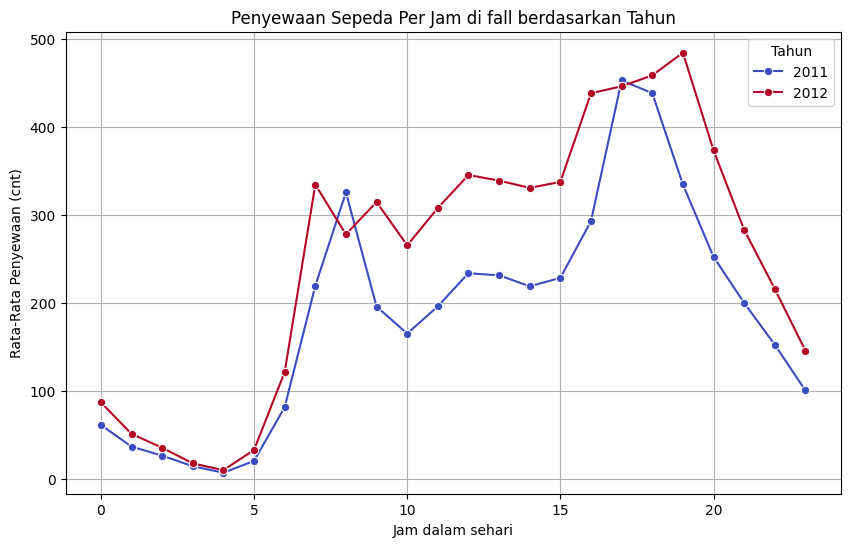

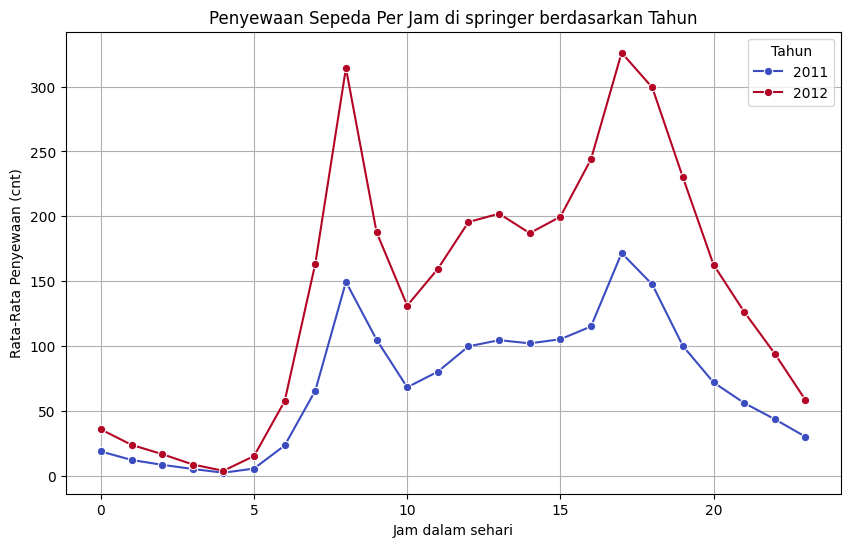

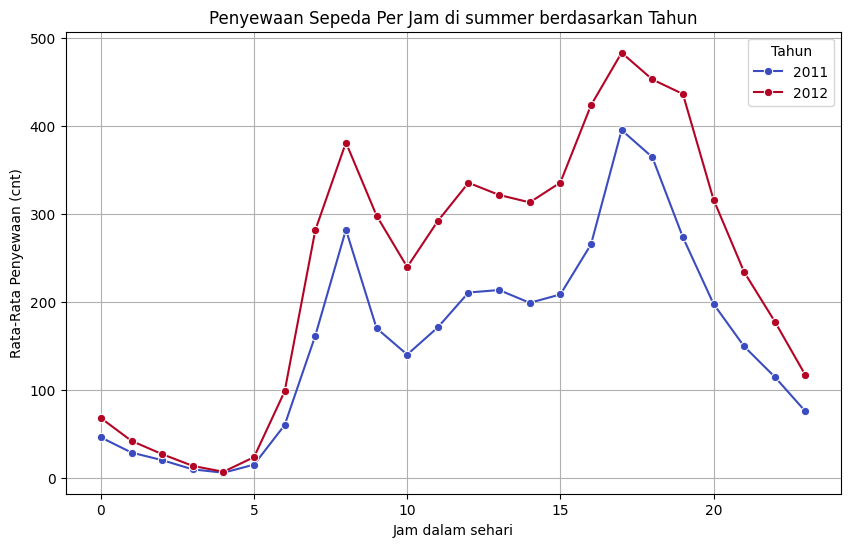

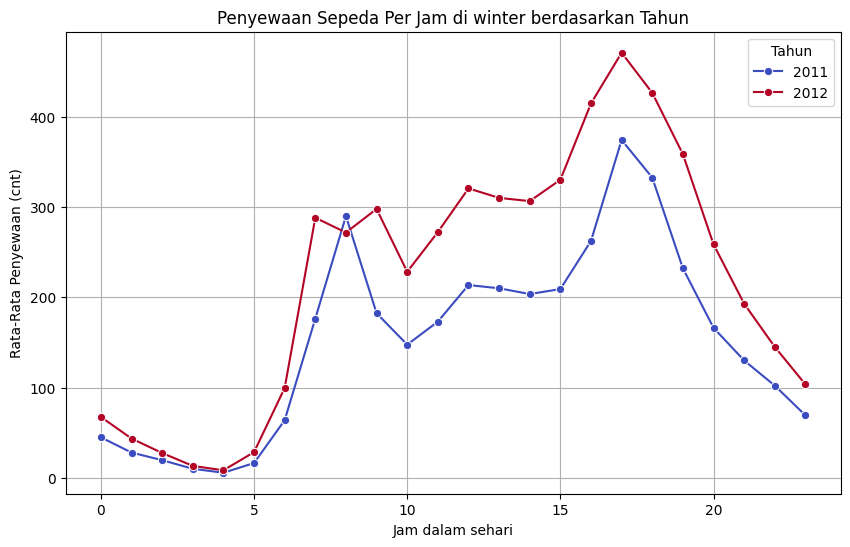

In [22]:
for season in hourly_trend['season'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=hourly_trend[hourly_trend['season'] == season],
                 x='hr', y='cnt', hue='yr', marker='o', palette='coolwarm')
    plt.title(f"Penyewaan Sepeda Per Jam di {season} berdasarkan Tahun")
    plt.xlabel("Jam dalam sehari")
    plt.ylabel("Rata-Rata Penyewaan (cnt)")
    plt.legend(title="Tahun")
    plt.grid(True)
    plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

#### **Pertanyaan 1 : Bagaimana pola musiman dalam permintaan penyewaan sepeda, dan bagaimana perbedaannya dari tahun ke tahun?**

Kesimpulan dari analisis mengungkapkan bahwa permintaan penyewaan sepeda mencapai puncaknya pada musim panas dan musim gugur, kemungkinan besar karena cuaca yang mendukung dan meningkatnya aktivitas di luar ruangan, sementara musim semi menunjukkan permintaan terendah, terutama pada tahun 2011. Penyewaan sepeda pada tahun 2012 secara konsisten lebih tinggi di semua musim dibandingkan dengan tahun 2011, yang mengindikasikan pertumbuhan popularitas bike-sharing, dengan peningkatan yang paling signifikan terjadi pada musim panas dan musim gugur. Outlier pada musim panas dan musim gugur menunjukkan lonjakan permintaan yang sesekali terjadi, mungkin terkait dengan hari libur atau acara, sedangkan musim dingin menunjukkan pola penyewaan yang lebih rendah dan lebih stabil. Secara keseluruhan, jumlah penyewaan tertinggi terjadi pada musim panas dan musim gugur di kedua tahun tersebut, dengan tahun 2012 menunjukkan peningkatan yang substansial dibandingkan tahun 2011.

#### **Pertanyaan 2 : Apa saja jam-jam sibuk untuk penyewaan sepeda pada musim-musim yang berbeda, dan bagaimana pola-pola ini bervariasi antara tahun 2011 dan 2012?**

Analisis ini menyoroti puncak permintaan penyewaan sepeda yang jelas pada jam-jam perjalanan, dengan puncak pagi (7-9 pagi) dan puncak sore (5-7 sore) yang diamati secara konsisten di seluruh musim dan tahun. Musim Panas dan Musim Gugur menunjukkan aktivitas penyewaan tertinggi sepanjang hari, dengan puncak pagi dan malam yang berbeda, serta peningkatan yang nyata di tengah hari yang kemungkinan besar didorong oleh pengguna yang berekreasi. Sebaliknya, Musim Dingin dan Musim Semi menunjukkan permintaan yang lebih rendah secara keseluruhan namun tetap memiliki puncak pagi dan sore hari. Penyewaan di tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011 di seluruh musim dan waktu, yang mencerminkan semakin populernya bike-sharing atau peningkatan infrastruktur.